# **Milestone 1**

### **Context:**

- The used cars market contains uncertainties in pricing and supply. The sellers are in a difficult position to predict the actual price of the car as several factors such as mileage, brand, model, year can influence it. This issue is important to solve as it ensures the sellers are receiving accurate and fair benefits of selling their vehicle. It also protects the market growth.

### **The objective:**

 - Goal is to come up with an effective pricing model that can accurately predict the price of used cars and can help the business in devising profitable strategies using differential pricing

### **The key questions:**

 - The price of new vehicles is missing for many entries in the dataset. How to handle these missing values?
 - Do we go with the simple linear regression approach or a random forest?


### **The problem formulation**:

- We must build a regression model along with basic data preprocessing, Feature engineering, treating the missing values, Univariate analysis and model tuning in order to select the optimal model for calculating the price of any available used car.
- To develop this model, we need to identify the most important features in the dataset.
- The entire dataset of 7253 used car entries can be split into train and test dataset on a 70% - 30% ratio

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
df = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
# View first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows
df.tail(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights**

- There are more missing values in New_price column.
- Most of the vehicles manufactured after 2012 are of automatic transmission
- Most of the cars are 5 seated
- Petrol Vehicles have the least mileage. Brand and Model of the car also impacts the Mileage


### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**

- More missing values in New_price value of the cars
- The missing values in seats can be filled using brand and model name of the car.
- Its possible there are manual entry errors with respective to missing Engine and Power values

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
df.drop(columns = 'S.No.')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights:**

- There is way too higher values under `Kilometers_Driven`. Possible discrepancy in data
- The standard deviation of `Kilometers_Driven` and `Engine` volume are high that indicates these values are more spread out.
- The mean is mostly closer to the median except for Engine volume which shows slightly skewed.
- Mileage cannot be 0. Possible discrepancy in data.


### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [10]:
cat_cols = df.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(df[column].unique())
    
    print('-'*50)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------------------------------------
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
For column: Transmission
['Manual' 'Automatic']
--------------------------------------------------
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
--------------------------------------------------


#### **Observations and Insights: **

- More used cars present in the metropolitan and cosmopolitan cities
- Mahindra XUVs are more sold in Mumbai in used car market
- Similar type of transmission and owner_type are more frequent

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [11]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
df.sort_values(by='Kilometers_Driven', ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: **

- Kilometers_Driven has one extreme value given that the year of the car is 2017.
- Diesel vehicles tends to be more driven and they are used by a single customer for a long time before they sell it. 
- Most of the Cars with the highest Kilometers_Driven are in Chennai.
- Diesel vehicles have the highest engine power

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [12]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
df.drop(df.index[2328], inplace = True)

**Check Mileage extreme values**

In [13]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
df.sort_values(by='Mileage').head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars cannot be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

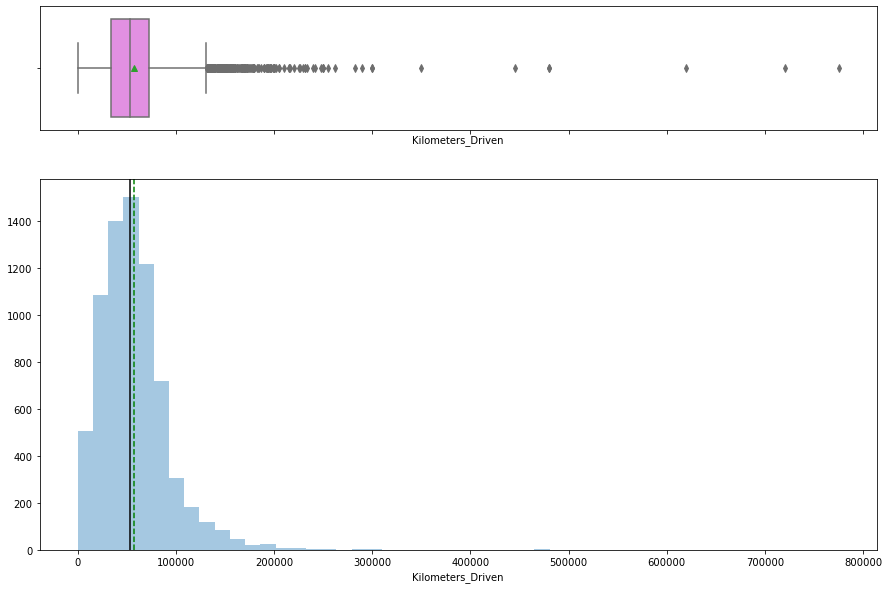

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(df['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

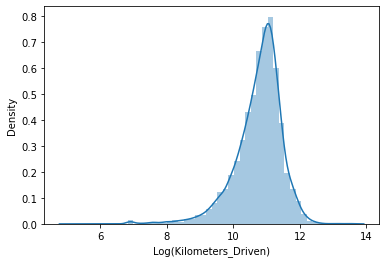

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(df["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:**

- The highest density of the data seems to be at around 11

In [17]:
# We can add a transformed kilometers_driven feature in data
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

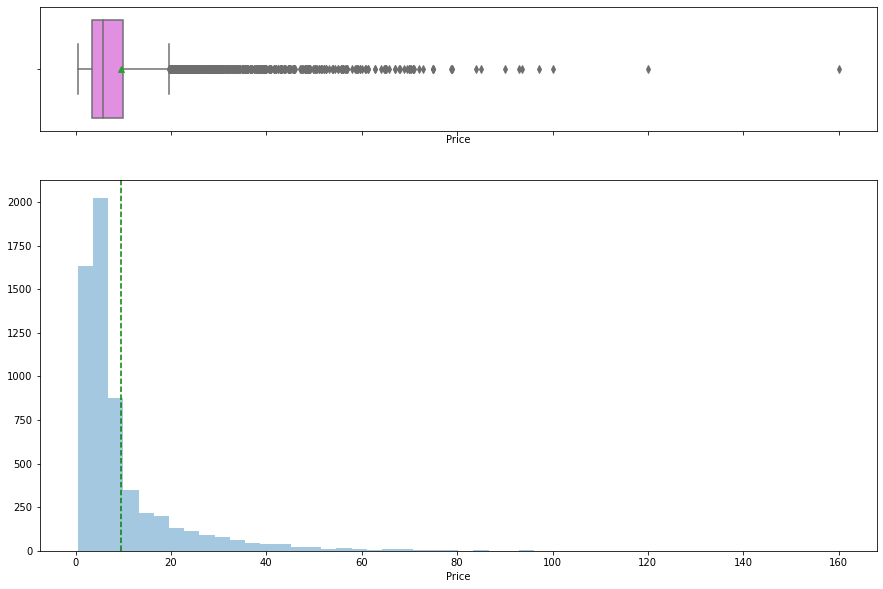

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(df['Price'])

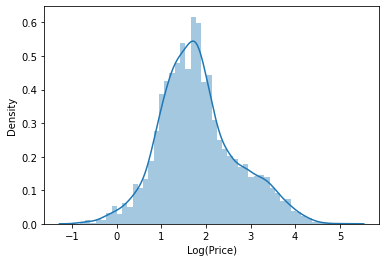

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(df["Price"]), axlabel = "Log(Price)");

In [20]:
# We can Add a transformed Price feature in data
df["price_log"] = np.log(df["Price"])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

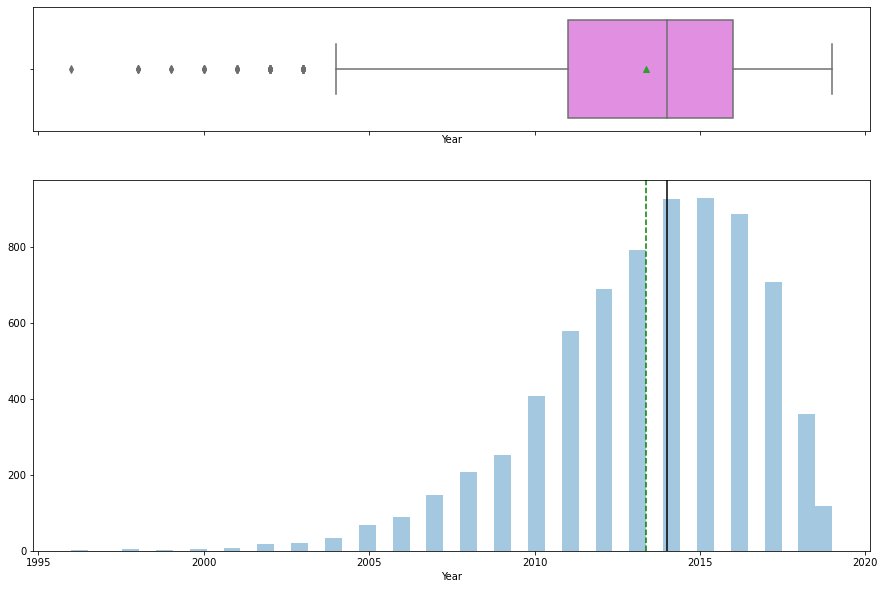

In [21]:
# histogram and box-plot for 'Year'
histogram_boxplot(df['Year'])

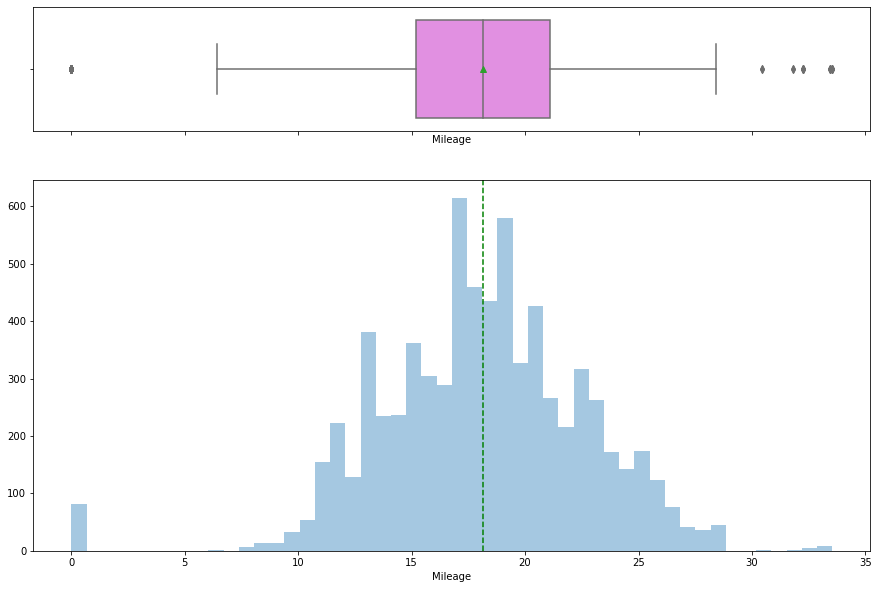

In [22]:
# histogram and box-plot for 'Mileage'
histogram_boxplot(df['Mileage'])

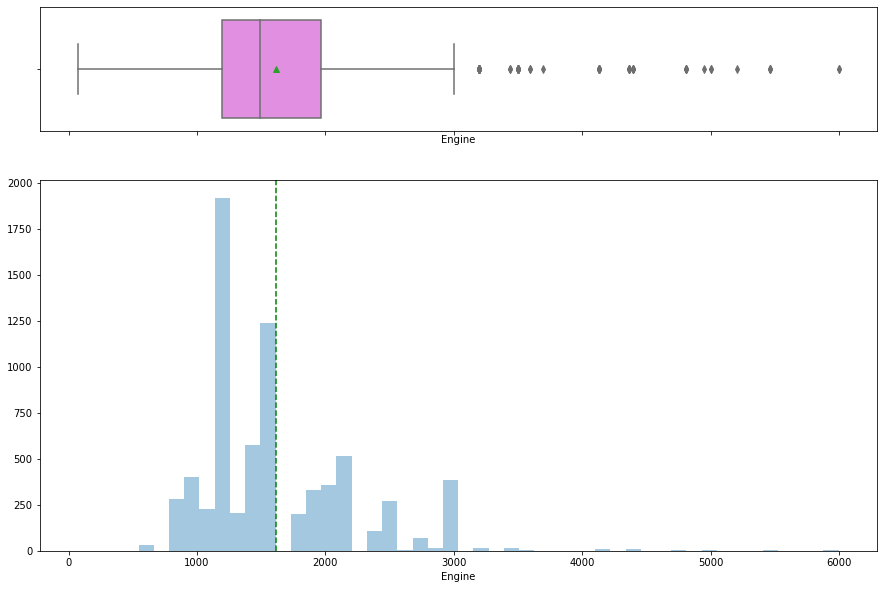

In [23]:
# histogram and box-plot for 'Engine' volume
histogram_boxplot(df['Engine'])

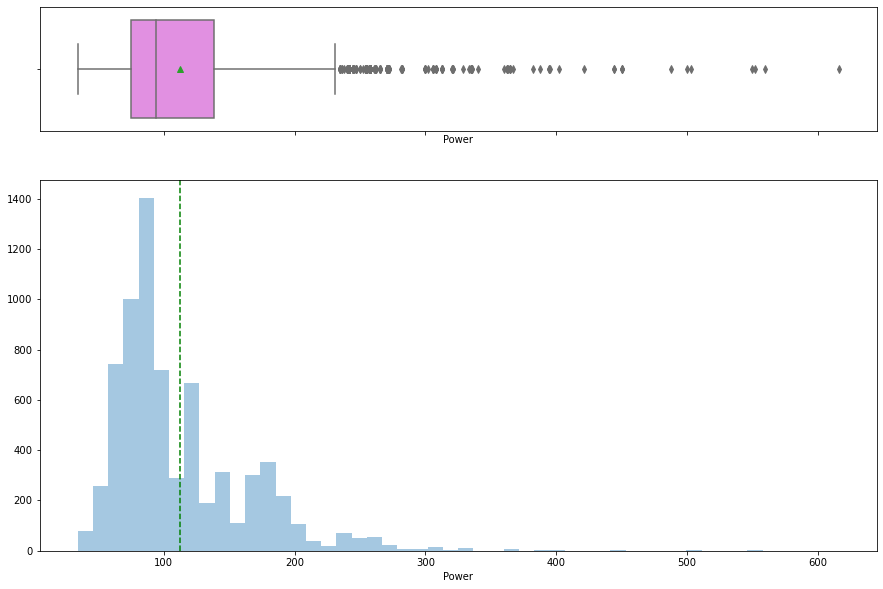

In [24]:
# histogram and box-plot for 'Power' of the engine
histogram_boxplot(df['Power'])

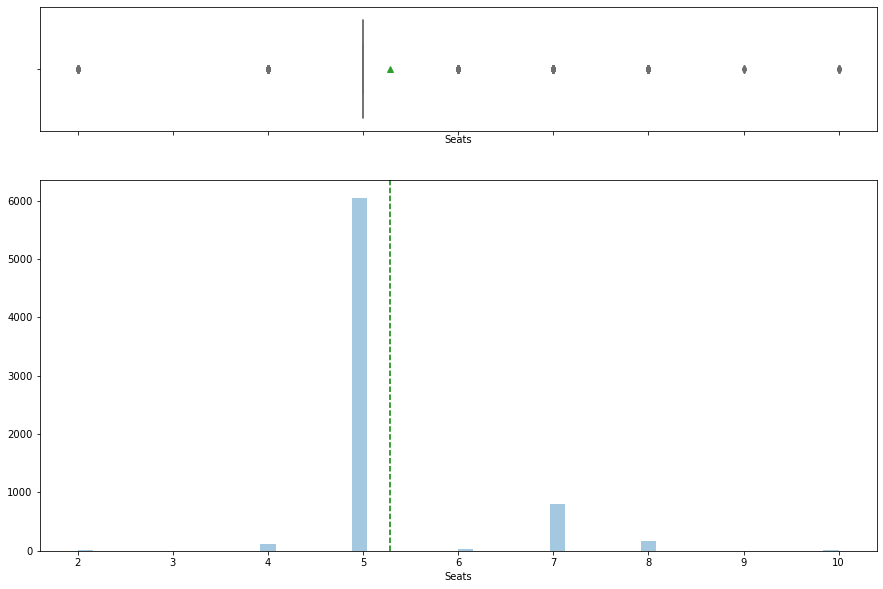

In [25]:
# histogram and box-plot for 'seats' in the car
histogram_boxplot(df['Seats'])

**Observations and Insights for all the plots:**

- There are few outliers in Year which doesn't have any significance, especially entries before year 2007 would not make any significance. So we can remove them.
- Mileage has some outliers on both sides which can be removed.
- Engine volume also has a lot of outliers.
- Enginer power is also highly rightly skewed so we can apply a log transformation on power.
- Number of seats is not uniformly distributed with most of the data around 5 seats.

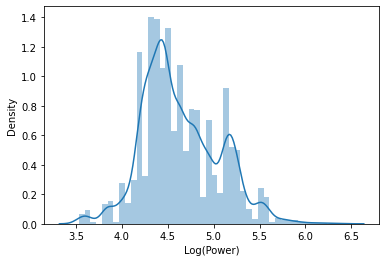

In [26]:
# Log transformation of the feature 'Power'
sns.distplot(np.log(df["Power"]), axlabel = "Log(Power)");

In [27]:
# We can add a transformed power feature in data
df["power_log"] = np.log(df["Power"])

## **2. Univariate analysis - Categorical Data**

In [28]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(df[z], palette = 'Paired', order = df[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

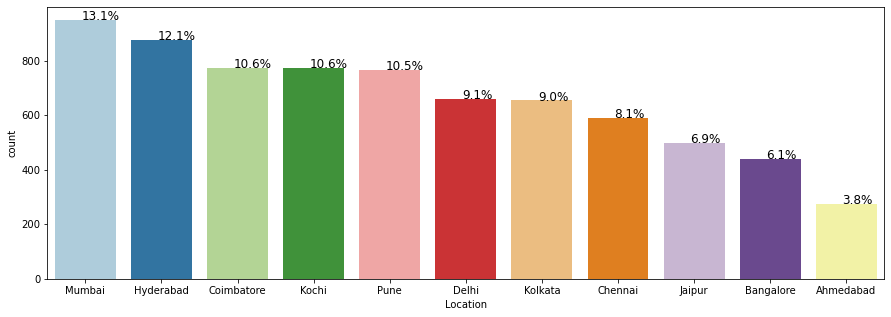

In [29]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

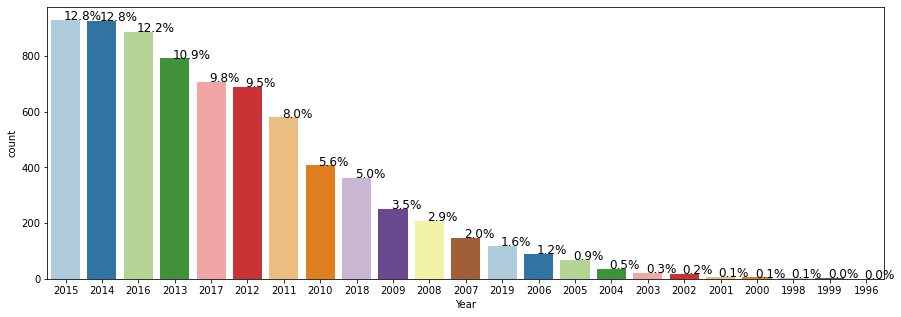

In [30]:
# Bar Plot for 'Year'
perc_on_bar('Year')

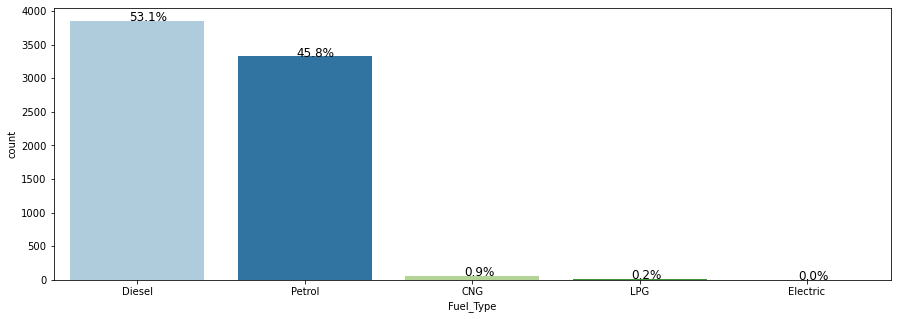

In [31]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

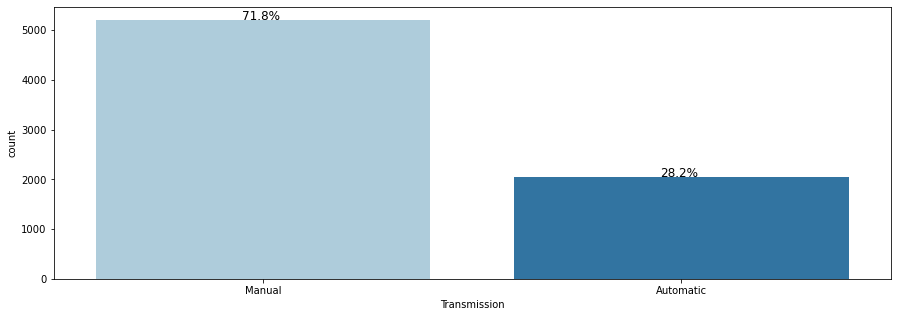

In [32]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

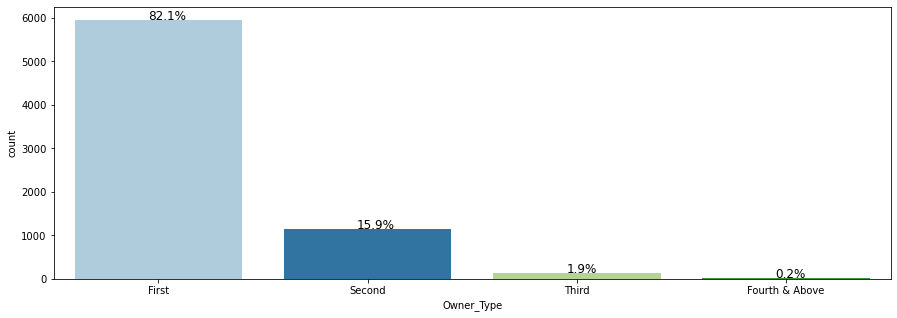

In [33]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:**

- Mumbai has the highest percentage of used cars for sale in market
- Cars manufactured during 2011-2016 are more in the used cars market
- First hand owners are selling their cars more. This means second and third hand cars cannot be priced higher for sale and would not benefit the customer selling it.
- Most people are selling the Manual transmission vehicles

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

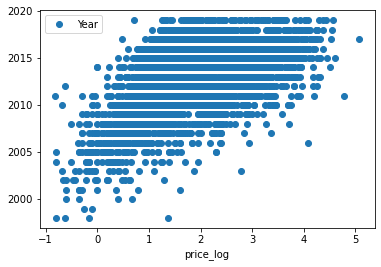

In [34]:
# Let us plot pair plot for the variables 'year' and 'price_log'
df.plot(x = 'price_log', y = 'Year', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

<AxesSubplot:xlabel='price_log'>

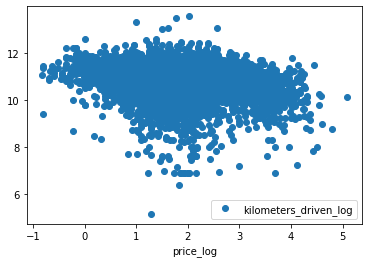

In [35]:
# Let us pair plot for the variables 'kilometers_driven_log' and 'price_log'
df.plot(x = 'price_log', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='price_log'>

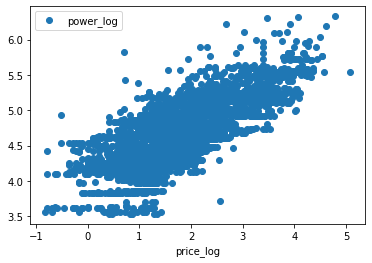

In [36]:
# Let us pair plot for the variables 'power_log' and 'price_log'
df.plot(x = 'price_log', y = 'power_log', style = 'o')

<AxesSubplot:xlabel='price_log'>

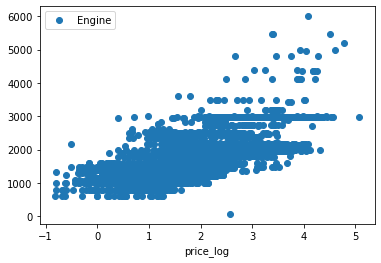

In [37]:
# Let us pair plot for the variables 'engine' and 'price_log'
df.plot(x = 'price_log', y = 'Engine', style = 'o')

<AxesSubplot:xlabel='price_log'>

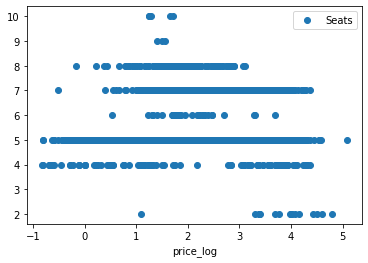

In [38]:
# Let us pair plot for the variables 'Seats' and 'price_log'
df.plot(x = 'price_log', y = 'Seats', style = 'o')

**Observations and Insights from all plots:**

- The price is higher for more recent cars. Meaning old cars are less priced comparitively with some outliers
- There doesn't seem to be a direct relationship between Kilometers driven and the price. Most of the cars are driven more than 80K kilometers but their price seems to be centered around 100,000 to 300,000
- Cars with more engine power tends to be expensive
- Engine volume doesnt seem to impact the price of the car
- Some Luxurious cars with limited seats are priced higher. 5 seated cars are priced at all levels.


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

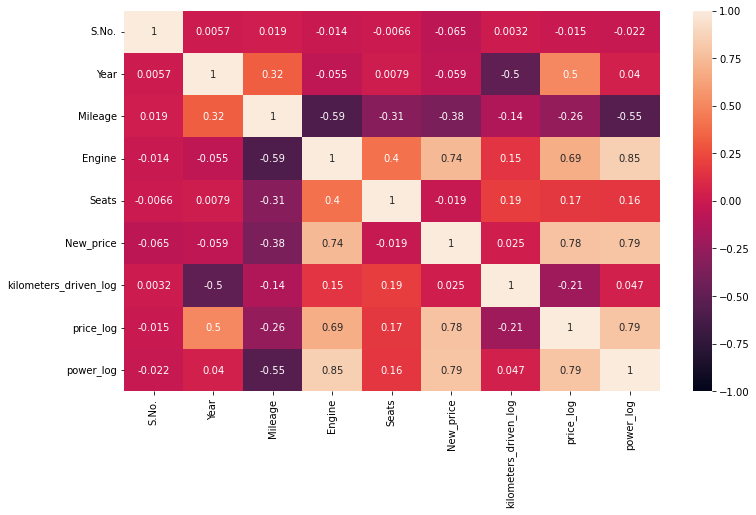

In [39]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(df.drop(['Kilometers_Driven', 'Price', 'Power'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**

- Year and Price are positively correlated. Mileage and Year also have posiive correlation
- Kilometers_driven and year have a significant negative correlation
- Mileage and Power, Mileage and Engine Volume have a significant negative correlation
- Price and Power, Price and engine volume, Price and New car price have the most significant positive correlation

### **3. Box plot**

In [40]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = df['price_log']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = df['price_log'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

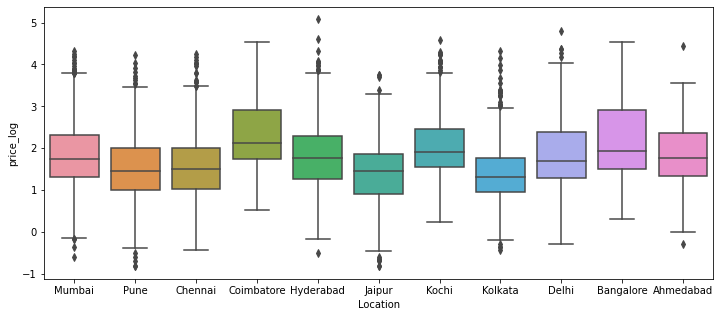

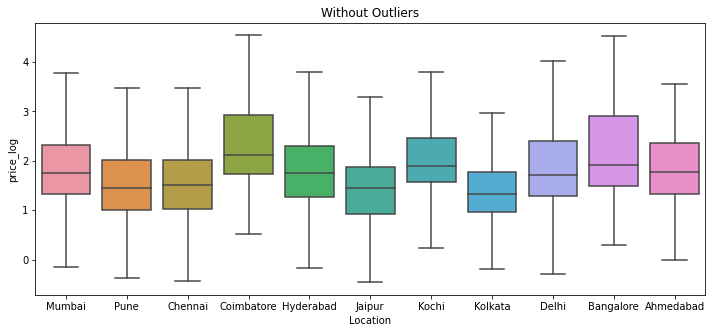

In [41]:
# Box Plot: Price vs Location
boxplot(df['Location'])

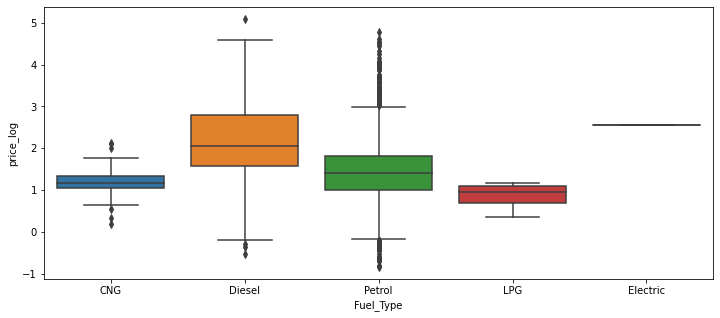

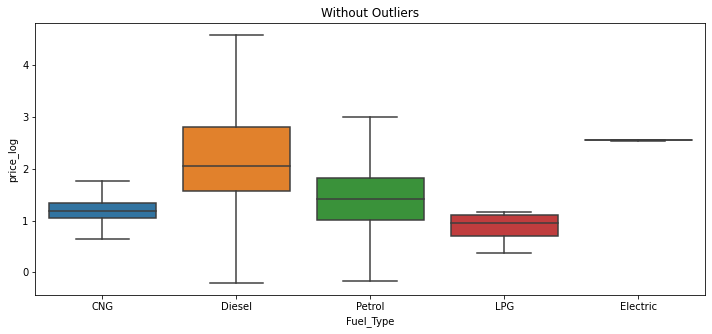

In [42]:
# Box Plot: Price vs Fuel_Type
boxplot(df['Fuel_Type'])

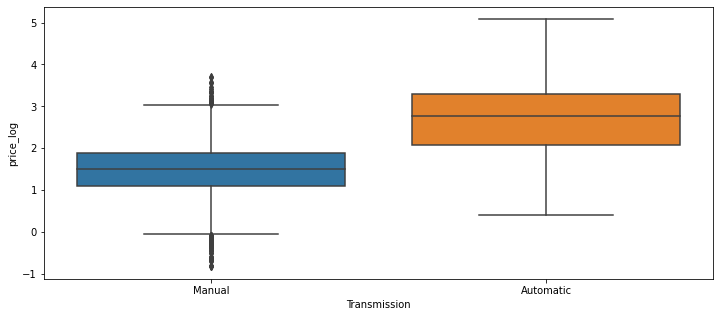

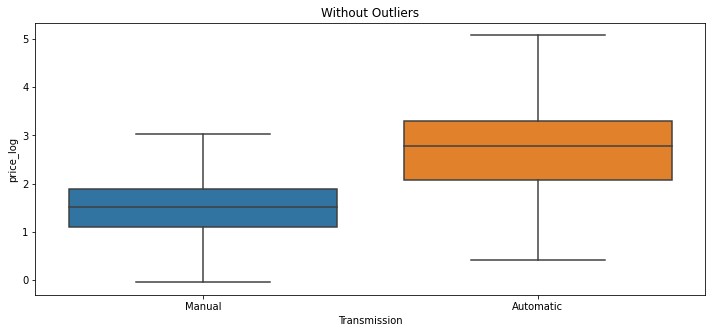

In [43]:
# Box Plot: Price vs Transmission
boxplot(df['Transmission'])

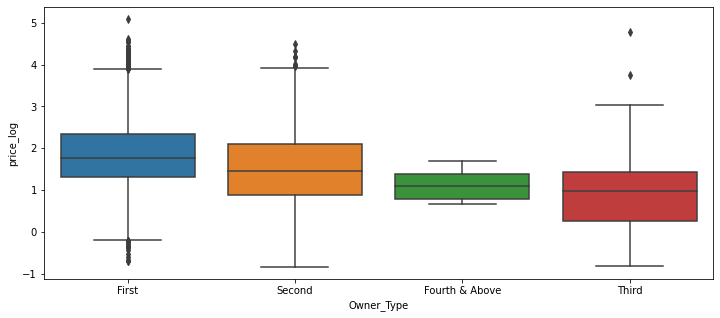

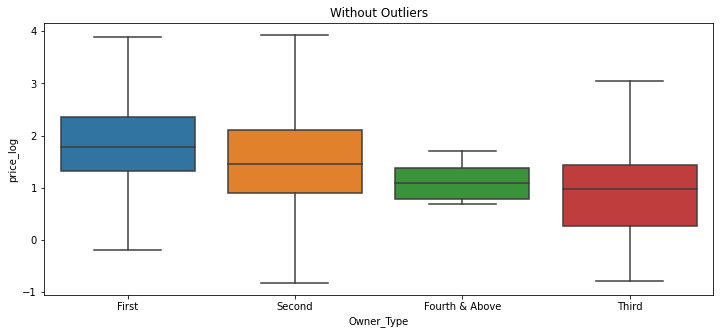

In [44]:
# Box Plot: Price vs Owner_Type
boxplot(df['Owner_Type'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:**

- Vehicle price is higher in cities like Banglore and Coimbatore. Bangalore being a silicon valley of India with more population needing cars for their daily commute. Coimbatore is developing as an IT Hub and more educated people are migrating there.
- Diesel and Automatic transmission vehicles are expensive.
- First and Second hand vehicles are priced more than others.


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

### **Missing value treatment**

In [45]:
# Now check the missing values of each column. Hint: Use isnull() method
df.isnull()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,power_log
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
7249,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
7250,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
7251,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False


#### **Observations and Insights:**

- More missing values in New car price.

**Missing values in Seats**

In [46]:
# Checking missing values in the column 'Seats'
df['Seats'].isnull().sum()

53

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

In [47]:
# To find median number of seats for the particular car, using the Brand and Model name.

df["Brand"] = df['Name'].str.split(' ').str[0]
df["Model"] = df['Name'].str.split(' ').str[1]

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [48]:
# Impute missing values in Seats,you can use fillna method in pandas
df['Seats'].fillna(df.groupby(['Brand','Model'])['Seats'].transform('median'),inplace = True)

In [49]:
df.Seats.fillna(df.Seats.median(), inplace = True)

In [50]:
# Now check total number of missing values of the seats column to verify if they are imputed or not. Hint: Use isnull() method
df['Seats'].isnull().sum()

0

**Missing values for New_price**

In [51]:
# Impute missing New_price. For example, use can use median or any other methods.
df['New_price'].fillna(df.New_price.median(), inplace= True)

In [52]:
# Now check total number of missing values of the New_price column to verify if they are imputed or not. Hint: Use isnull() method
df['New_price'].isnull().sum()

0

**Missing values for Power**

In [53]:
# Impute missing Power. For example, use can use median or any other methods.
df['Power'].fillna(df.Power.median(), inplace = True)

In [54]:
# Now check total number of missing values of the Power column to verify if they are imputed or not. Hint: Use isnull() method
df['Power'].isnull().sum()

0

**Missing values for Engine**

In [55]:
# Impute missing Engine. For example, use can use median or any other methods.
df['Engine'].fillna(df.Engine.median(), inplace = True)

In [56]:
# Now check total number of missing values of the Engine column to verify if they are imputed or not. Hint: Use isnull() method
df['Engine'].isnull().sum()

0

**Missing values for Mileage**

In [57]:
# Impute missing Mileage. For example, use can use median or any other methods.
df['Mileage'].fillna(df.Mileage.median(), inplace = True)

In [58]:
# Now check total number of missing values of the Mileage column to verify if they are imputed or not. Hint: Use isnull() method
df['Mileage'].isnull().sum()

0

**Observations for missing values after imputing: _____**

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [59]:
df_cleaned = df.copy()
df_cleaned.to_csv("cars_data_updated.csv", index = False)